# 06-2 k-평균

진짜 비지도 학습에서는 사진에 어떤 과일이 들어있는지 알지 못합니다.

**k-평균**k-means 군집 알고리즘이 평균값을 자동으로 찾아줍니다. 이 평균값이 클러스터의 중심에 위치하기 때문에 **클러스터 중심**cluster center 또는 **센트로이드**centroid라고 부릅니다.

## k-평균 알고리즘 소개

k-평균 알고리즘의 작동 방식은 다음과 같습니다.
1. 무작위로 k개의 클러스터 중심을 정합니다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정합니다.
3. 클러스터에 속한 샘프르이 평균값으로 클러스터 중심을 변경합니다.
4. 클러스터 중심에 변화가 없을 때 까지 2번으로 돌아가 반복합니다.

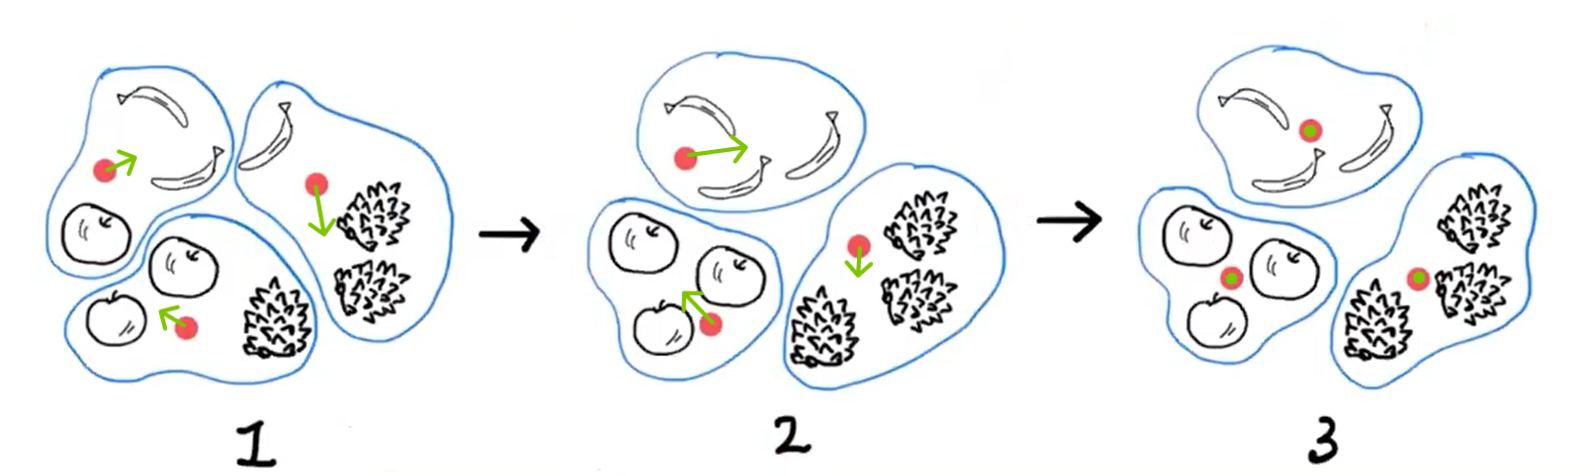

## KMeans 클래스

1절에서 사용했던 데이터셋 사용합니다.

In [1]:
import requests

url = 'https://bit.ly/fruits_300_data'
response = requests.get(url)

with open('fruits_300.npy', 'wb') as file:
    file.write(response.content)

그다음 넘파이 np.load() 함수를 사용해 npy 파일을 읽어 넘파이 배열을 준비합니다. k-평균 모델을 훈련하기 위해 (샘플 개수, 너비, 높이) 크기의 3차원 배열을 (샘플 개수, 너비×높이) 크기를 가진 2차원 배열로 변경합니다.

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

사이킷런의 k-평균 알고리즘은 sklearn.cluster 모듈 아래 KMeans 클래스에 구현되어 있습니다. 이 클래스에서 설정할 매개변수는 클러스터 개수를 지정하는 n_clusters입니다. 여기에서는 클러스터 개수를 3으로 지정하겠습니다.

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됩니다. labels_ 배열의 길이는 샘플 개수와 같습니다. 이 배열은 각 샘플이 어떤 레이블에 해당되는지 나타냅니다.

In [4]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

레이블 0, 1, 2로 모은 샘플의 개수 확인

In [5]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위해 간단한 유틸리티 함수 draw_fruits()를 만들어 보겠습니다.

In [7]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)  # 샘플 개수
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:  # n개까지만 그립니다
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits() 함수는 (샘플 개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력합니다.

이 함수를 사용해 레이블이 0인 과일 사진을 모두 그려보겠습니다.

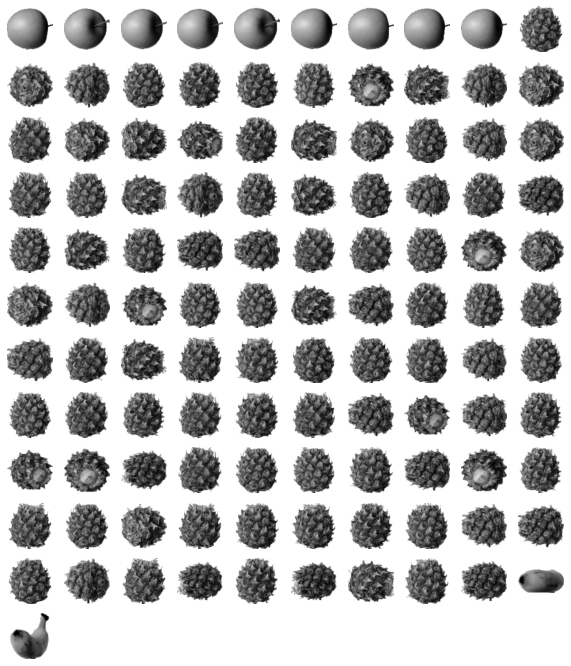

In [9]:
draw_fruits(fruits[km.labels_==0])

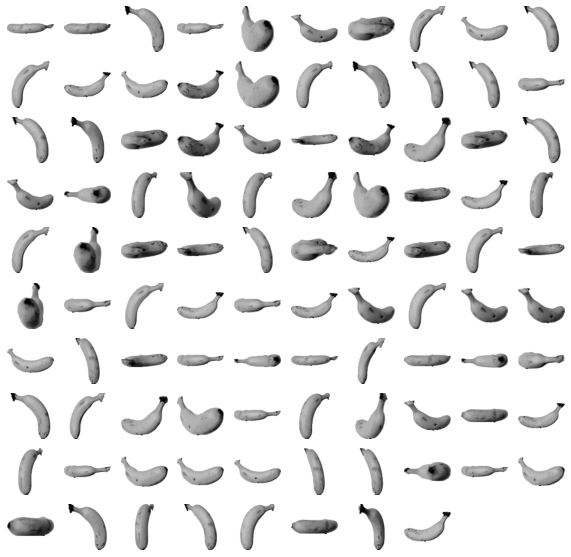

In [10]:
draw_fruits(fruits[km.labels_==1])

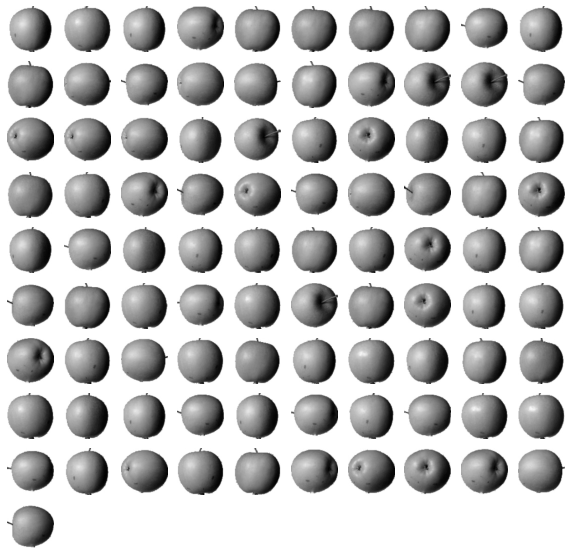

In [11]:
draw_fruits(fruits[km.labels_==2])

레이블이 0인 클러스터는 파인애플에 사과 9개와 바나나 2개가 섞여 있네요. k-평균 알고리즘이 이 샘플들을 완벽하게 구별해내지는 못했습니다. 하지만 훈련 데이터에 타깃 레이블을 전혀 제공하지 않았음에도 스스로 비슷한 샘플들을 아주 잘 모은 것 같습니다.

## 클러스터 중심

KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있습니다. 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 각 중심을 이미지로 출력하려면 100×100 크기의 2차원 배열로 바꿔야 합니다.

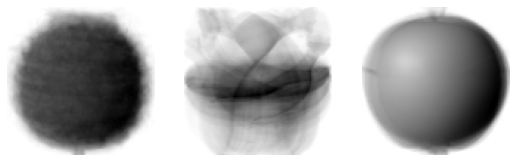

In [12]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

이전 절에서 사과, 바나나, 파인애플의 픽셀 평균값을 출력했던 것과 매우 비슷하네요(296쪽)

KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform() 메서드를 가지고 있습니다. transform() 메서드가 있다는 것은 마치 StandardScaler 클래스처럼 특성값을 변환하는 도구로 사용할 수 있다는 의미입니다.

인덱스가 100인 샘플에 transform() 메서드를 적용해 보죠. fit() 메서드와 마찬가지로 2차원 배열을 기대합니다.

In [13]:
km.transform(fruits_2d[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

하나의 샘플을 전달했기 때문에 반환된 배열은 크기가 (1, 클러스터 개수)인 2차원 배열입니다. 첫 번재 클러스터(레이블 0), 두 번째 클러스터(레이블 1)가 각각 첫 번재 원소, 두 번재 원소의 값입니다. 첫 번째 클러스터까지의 거리가 3393.8로 가장 작네요. 이 샘플은 레이블 0에 속한 것 같습니다. KMeans 클래스는 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 predict() 메서드를 제공합니다.

In [15]:
km.predict(fruits_2d[100:101])

array([0])

transform()의 결과에서 짐작할 수 있듯이 레이블 0으로 예측했습니다.

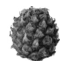

In [16]:
draw_fruits(fruits[100:101])

k-평균 알고리즘은 앞에서 설명했듯이 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾습니다. 알고리즘이 반복한 횟수는 KMeans 클래스의 n_ter_ 속성에 저장됩니다.

In [17]:
km.n_iter_

4

클러스터 중심을 특성 공학처럼 사용해 데이터셋을 저차원(이 경우에는 10000에서 3으로 줄입니다)으로 변환할 수 있습니다.

이번에 우리는 타깃값을 사용하지 않았지만, 약간의 편법을 사용했습니다. n_clusters를 3으로 지정한 것은 타깃에 대한 정보를 활용한 셈입니다. 실전에서는 클러스터 개수조차 알 수 없습니다.

## 최적의 k 찾기

사실 군집 알고리즘에서 적절한 k 값을 찾기 위한 완벽한 방법은 없습니다. 여기서는 적절한 클러스터 개수를 찾기 위한 대표적인 방법인 **엘보우**elbow 방법에 대해 알아보겠습니다.

k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있습니다. 이 거리의 제곱의 합을 **이너셔**inertia라고 부릅니다. 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지는 나타내는 값으로 생각할 수 있습니다. 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어듭니다. 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법입니다.

클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있습니다. 이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않습니다.

즉 이너셔가 크게 줄어들지 않습니다. 이 지점이 마치 팔꿈치 모양이어서 엘보우 방법이라 부릅니다.

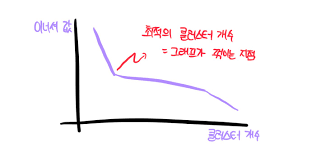

친절하게도 KMeans 클래스는 자동으로 이너셔를 계산해서 inertia_ 속성으로 제공합니다. 다음 코드에서 클러스터 개수 k를 2~6까지 바꿔가며 KMeans 클래스를 5번 훈련합니다.

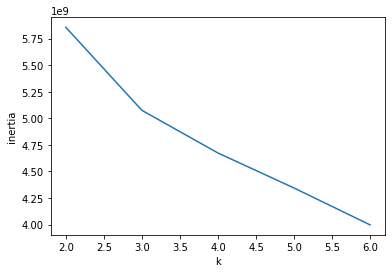

In [19]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

이 그래프에서는 꺾이는 지점이 두드러지지는 않지만, k = 3에서 그래프의 기울기가 조금 바뀐 것을 볼 수 있습니다. 엘보우 지점보다 클러스터 개수가 많아지면 이너셔의 변화가 줄어들면서 군집 효과도 줄어듭니다.

## 마무리

### 핵심 포인트

- **k-평균**: 알고리즘은 처음에 랜덤하게 클러스터 중심을 정하고 클러스터를 만듦. 그다음 클러스터의 중심을 이동하고 다시 클러스터를 만드는 식으로 반복해서 최적의 클러스터를 구성하는 알고리즘입니다.
- **클러스터 중심**: k-평균 알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값.
- **엘보우 방법**: 최적의 클러스터 개수를 정하는 방법 중 하나. 클러스터 개수에 따라 이너셔 감소가 꺾이는 지점이 적절한 클러스터 개수 k가 될 수 있음.

### 핵심 패키지와 함수

#### scikit-learn

- **KMeans**: k-평균 알고리즘 클래스   
  n_clusters에는 클러스터 개수를 지정. 기본값 8   
  처음에 랜덤하게 센트로이드를 초기화하기 때문에 여러 번 반복하여 이너셔를 기준으로 가장 좋은 결과 선택. n_init는 이 반복 횟수 지정. 기본값 10이었으나 사이킷런 버전 1.4에서는 'auto'로 변경 예정   
  max_iter는 k-평균 알고리즘의 한 번 실행에서 최적의 센트로이드를 찾기 위해 반복할 수 있는 최대 횟수. 기본값 200